---

# 3.5 Minimizing a function in one variable

---

We can use the root-finding methods described above to find the **minimum** or **maximum** value of a function $\phi \in C^2[a,b]$.

Recall that $x^* \in (a,b)$ is a **critical point** of $\phi$ if 

$$\phi'(x^*) = 0.$$

We can find $x^*$ by applying Newton's method to this nonlinear equation to obtain:

$$x_{k+1} = x_k - \frac{\phi'(x_k)}{\phi''(x_k)}.$$

## Another interpretation

We can also obtain this by considering the **second-order (quadratic) approximation** of $\phi$ around the point $x_k$:

$$\phi(x) \approx \phi(x_k) + \phi'(x_k)(x-x_k) + \frac{\phi''(x_k)}{2}(x-x_k)^2, \quad \text{for all $x \approx x_k$}.$$

If $x_k$ is close to $x^*$, we expect the minimum/maximum of $\phi$ to be near the minimum/maximum of the **quadratic approximation** of $\phi$:

$$q(x) = \phi(x_k) + \phi'(x_k)(x-x_k) + \frac{\phi''(x_k)}{2}(x-x_k)^2.$$

We should choose $x_{k+1}$ to be the critical point of $q$, so we want to find $x_{k+1}$ such that $q'(x_{k+1}) = 0$. Note that

$$q'(x) = \phi'(x_k) + \phi''(x_k)(x-x_k).$$

Thus $q'(x_{k+1}) = 0$ gives us

$$x_{k+1} = x_k - \frac{\phi'(x_k)}{\phi''(x_k)}.$$

---

## Example

Let's find the minimum value of 

$$\phi(x) = 10\cosh(x/4) - x$$

by applying Newton's method.

In [1]:
using Plots, Printf

function plotnewton(f, fp, x0, a, b; tol=1e-6, maxiter=10)
    
    plt = plot(f, a, b, color=:blue, label=:none)
    hline!([0], color=:black, label=:none)
    
    k = 0
    x = x0
    fx = f(x)
    xold, xnew = x, Inf
    @printf "%4s %22s %22s\n" "k" "x" "f(x)"
    while abs(xnew - xold) > tol*(1 + abs(xold)) && k < maxiter
        k += 1
        xnew = x - fx/fp(x)
        
        # Plotting stuff
        plot!([x, x], [0, fx], ls=:dot, c=:black, label=:none)
        plot!([xnew, x], [0, fx], c=:red, label=:none)
        scatter!([x], [fx], c=:blue, label=:none)
        
        xold = x
        x = xnew
        fx = f(x)
        @printf "%4d %22.15e %22.15e\n" k x fx
    end
    flush(stdout)
    display(plt)
    
    return x
    
end

plotnewton (generic function with 1 method)

In [2]:
ϕ(x) = 10cosh(x/4) - x

ϕ (generic function with 1 method)

In [3]:
ϕp(x) = 2.5sinh(x/4) - 1

ϕp (generic function with 1 method)

In [4]:
ϕpp(x) = 0.625cosh(x/4)

ϕpp (generic function with 1 method)

   k                      x                   f(x)
   1  6.314456778482243e+00  4.802464636989844e+00
   2  3.274016070134738e+00  1.282518404184465e+00
   3  1.758594837858688e+00  1.348739477880878e-01
   4  1.562095199641004e+00  1.315392386938452e-03
   5  1.560141456443258e+00  1.193893717221783e-07
   6  1.560141279082863e+00  1.110223024625157e-15


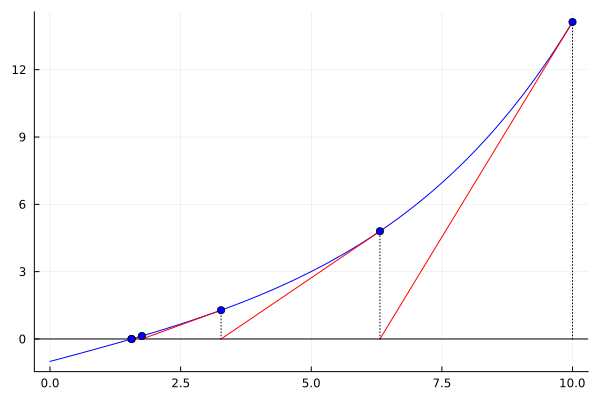

1.5601412790828626

In [5]:
x0, a, b = 10., 0., 10.

x = plotnewton(ϕp, ϕpp, x0, a, b)

In [6]:
ϕpp(x)

0.6731456008918131

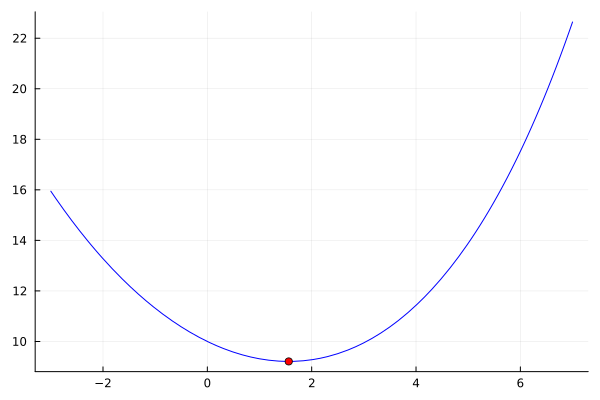

In [7]:
plot(ϕ, -3, 7, c=:blue, legend=:none)
scatter!([x], [ϕ(x)], c=:red)

Thus 

$$x^* = 1.560141279082861\ldots.$$ 

Note that $\phi'(x^*) = 0$, as required. Since $\phi''(x^*) > 0$, we know that 

$$\phi(x^*) = 9.210188335186146\ldots$$ 

is a **local minimum value** of $\phi$.

In fact, since $\phi''(x) > 0$ for all $x$, we know that $\phi(x^*)$ is the **global minimum value** of $\phi$.

---